<a href="https://colab.research.google.com/github/ricardocarreras/Bootcamp_DataScience_student/blob/master/tweetsayusocon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install tweepy


In [8]:
import pandas as pd

In [9]:
import tweepy

# Configura las credenciales de acceso a la API de Twitter
consumer_key = 'TpOaJ2x2ZlK85Yc8nWxuj5G3c'
consumer_secret = 'bERVKBantrLO1qF8MJkAgrxeHd3NL3bHEReN8lz9KkvtYooIcO'
access_token = '80347254-Mb585QCTiQu0WlylC7QsoXDGeY2uUKDYqPormSgcI'
access_token_secret = '56qrJX96Uaw8JaX5xRy4tlfPN7vipDxs3r3JDjYsr55no'

# Autenticación con la API de Twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Crea un objeto API
api = tweepy.API(auth)


In [ ]:
# Obtén los tweets de @IdiazAyuso en el rango de fechas especificado
tweets = api.user_timeline(screen_name='IdiazAyuso', count=3200, tweet_mode='extended', since= '2023-05-12',
until= '2023-05-26', include_rts=False, exclude_replies=True)


In [12]:
# Guarda los tweets en un archivo CSV
with open('tweets_ayuso.csv', 'w', encoding='utf-8') as file:
    file.write('Fecha,Texto\n')  # Escribir encabezados en el archivo CSV
    for tweet in tweets:
        file.write(f'{tweet.created_at},{tweet.full_text.replace(",", " ")}\n')


In [13]:
tweetsAyuso23=pd.read_csv("/content/tweets_ayuso.csv")

In [ ]:
tweetsAyuso23

In [15]:
!pip install wordcloud

In [16]:
from wordcloud import WordCloud, STOPWORDS

In [17]:
stopwords = set(STOPWORDS)
stopwords.add("https")

In [ ]:
stopwords

In [ ]:
import nltk
nltk.download('stopwords')

In [20]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Carga la lista de stopwords en español
stopwords_es = set(stopwords.words('spanish'))

# Agrega la palabra "https" a la lista de stopwords en español
stopwords_es.add('https')
stopwords_es.add('nan')
stopwords_es.add('t')
stopwords_es.add('co')

# Crea una instancia de WordCloud y establece las stopwords en español
wordcloud = WordCloud(stopwords=stopwords_es)


In [ ]:
# Genera la nube de palabras
wordcloud.generate(xxxxxx)


In [ ]:
comment_words = '' 
for val in tweetsAyuso23.Texto: 
    val = str(val) 
    tokens = val.split()  
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud.generate(comment_words)

In [22]:
import matplotlib.pyplot as plt

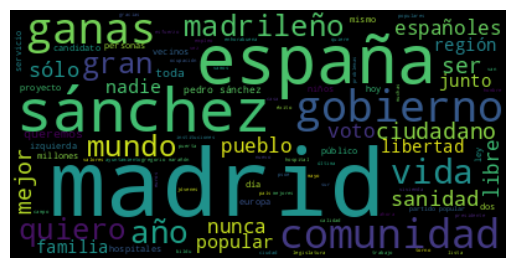

In [23]:
plt.figure() 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show() 

In [30]:
from collections import Counter
import re
text = comment_words
words = re.findall('\w+',text)
print(Counter(words).most_common(70))

[('de', 207), ('nan', 163), ('la', 135), ('y', 86), ('el', 84), ('https', 68), ('t', 68), ('co', 68), ('en', 67), ('a', 65), ('los', 56), ('madrid', 51), ('que', 49), ('con', 35), ('las', 32), ('es', 32), ('por', 29), ('del', 29), ('más', 25), ('al', 25), ('no', 24), ('sánchez', 23), ('españa', 22), ('para', 22), ('un', 21), ('una', 20), ('todos', 18), ('gobierno', 15), ('ganas', 15), ('su', 15), ('comunidad', 13), ('se', 13), ('todo', 11), ('ha', 11), ('vida', 9), ('popular', 9), ('nos', 8), ('sus', 8), ('está', 8), ('gran', 7), ('mundo', 7), ('quiero', 7), ('como', 7), ('contra', 7), ('entre', 6), ('le', 6), ('ser', 6), ('nuestro', 6), ('mejor', 6), ('sanidad', 6), ('sólo', 6), ('han', 5), ('pedro', 5), ('lo', 5), ('sin', 5), ('nunca', 5), ('españoles', 5), ('nadie', 5), ('este', 5), ('libertad', 5), ('madrileños', 5), ('años', 5), ('región', 5), ('queremos', 5), ('mi', 5), ('son', 5), ('esta', 4), ('niños', 4), ('vecinos', 4), ('pueblo', 4)]


In [ ]:

# Realiza la consulta para tweets en español que mencionen a @IdiazAyuso en el rango de fechas especificado
query = 'from:IdiazAyuso lang:es'
max_tweets = 10000  # Define el número máximo de tweets que deseas obtener
tweets = tweepy.Cursor(api.search_tweets, q=query, tweet_mode='extended').items(max_tweets)

# Procesa los tweets obtenidos
for tweet in tweets:
    print(tweet.full_text)


In [26]:
# Guarda los tweets en un archivo CSV
with open('tweetstodosayuso.csv', 'w', encoding='utf-8') as file:
    file.write('Fecha,Texto\n')  # Escribir encabezados en el archivo CSV
    for tweet in tweets:
        file.write(f'{tweet.created_at},{tweet.full_text.replace(",", " ")}\n')

In [28]:
tweetstodosAyuso23=pd.read_csv("/content/tweetstodosayuso.csv")